In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('Second Iteration Data\data_gathered_part_first_segmentation.csv')

In [39]:
df.head()

,tag_h,tag_p,tag_formatting,tag_table,word_count,children_ratio,children,id_relevance_extent,tag_main,tag_article,x,y,height,width,element_area_ratio,label
0,0,0,0,NO,48,0.034146,7,1,NO,NO,0,10,130.000000,1266.400024,0.022571,1
1,12,45,45,NO,3193,0.000932,16,2,NO,NO,166,140,5594.600098,934.000000,0.716395,2
2,0,0,0,NO,1,1.000000,0,0,NO,NO,0,0,0.000000,0.000000,0.000000,0
3,0,0,0,NO,1,1.000000,0,0,NO,NO,0,0,80.000000,1266.400024,0.114416,1
4,0,0,0,NO,1,1.000000,0,0,NO,NO,176,0,80.000000,1090.400024,0.098515,1


In [40]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 16 columns):
tag_h                  803 non-null int64
tag_p                  803 non-null int64
tag_formatting         803 non-null int64
tag_table              803 non-null object
word_count             803 non-null int64
children_ratio         803 non-null float64
children               803 non-null int64
id_relevance_extent    803 non-null int64
tag_main               803 non-null object
tag_article            803 non-null object
x                      803 non-null int64
y                      803 non-null int64
height                 803 non-null float64
width                  803 non-null float64
element_area_ratio     803 non-null float64
label                  803 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 100.5+ KB


,tag_h,tag_p,tag_formatting,word_count,children_ratio,children,id_relevance_extent,x,y,height,width,element_area_ratio,label
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,1.165629,1.821918,14.665006,323.551681,0.969545,1.997509,0.077210,14.412204,485.574097,483.144002,201.627152,0.174571,0.301370
std,5.707869,10.084032,147.795306,2815.152027,4.936274,6.014529,0.348157,128.747053,2954.326664,2722.507897,451.840175,1.838045,0.868591
min,0.000000,0.000000,0.000000,1.000000,0.000004,0.000000,0.000000,-1000.000000,-15985.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.004800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,76.000000,142.000000,3883.000000,70061.000000,70.000000,70.000000,3.000000,1167.000000,38129.000000,38049.683590,1286.400024,46.855930,4.000000


Inferences- 
1. As can be seen from df.head(), almost all the independant variables have high degree of variance: the max value is much higher than the third quartile. 
2. The first quartile, third quartile and the median are almost similar. This indicates the presence of huge amount of outliers.
3. However, as this is a classification problem, this kind of variance only means that high magnitude values for all the independent variables are very less in the dataset. These aren't outliers

In [41]:
df.label.unique()
df.label.value_counts()

0    694
2     38
1     36
4     25
3     10
Name: label, dtype: int64

In [42]:
tag_h = df.tag_h.values
label = df.label.values

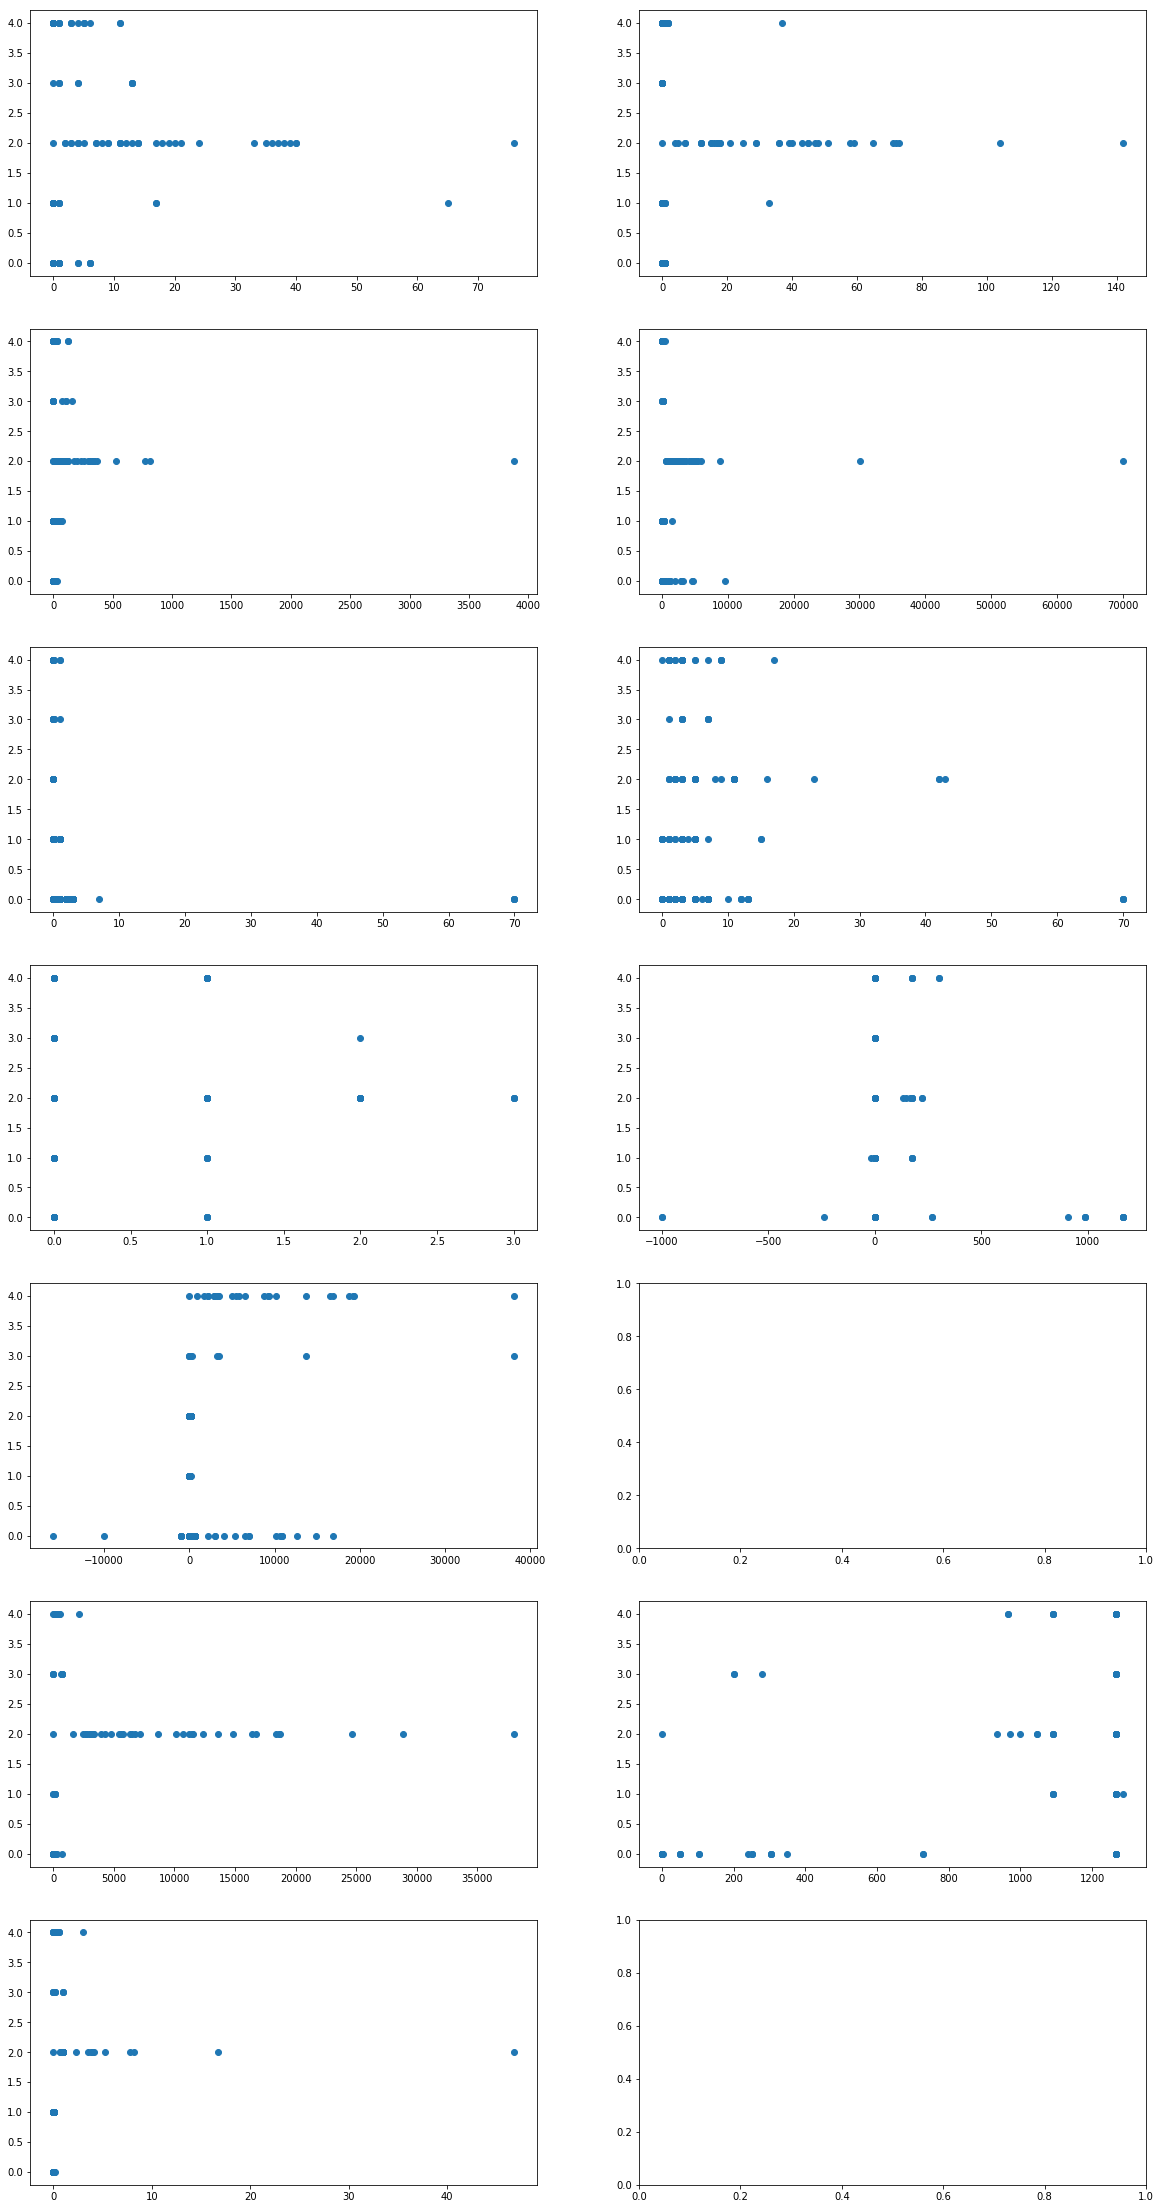

In [43]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (20,40), nrows = 7, ncols = 2)

ax[0, 0].scatter(df.tag_h.values, label)
ax[0, 1].scatter(df.tag_p.values, label)
ax[1, 0].scatter(df.tag_formatting.values, label)
ax[1, 1].scatter(df.word_count.values, label)
ax[2, 0].scatter(df.children_ratio.values, label)
ax[2, 1].scatter(df.children.values, label)
ax[3, 0].scatter(df.id_relevance_extent.values, label)
ax[3, 1].scatter(df.x.values, label)
ax[4, 0].scatter(df.y.values, label)
ax[5, 0].scatter(df.height.values, label)
ax[5, 1].scatter(df.width.values, label)
ax[6, 0].scatter(df.element_area_ratio, label)

In [54]:
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

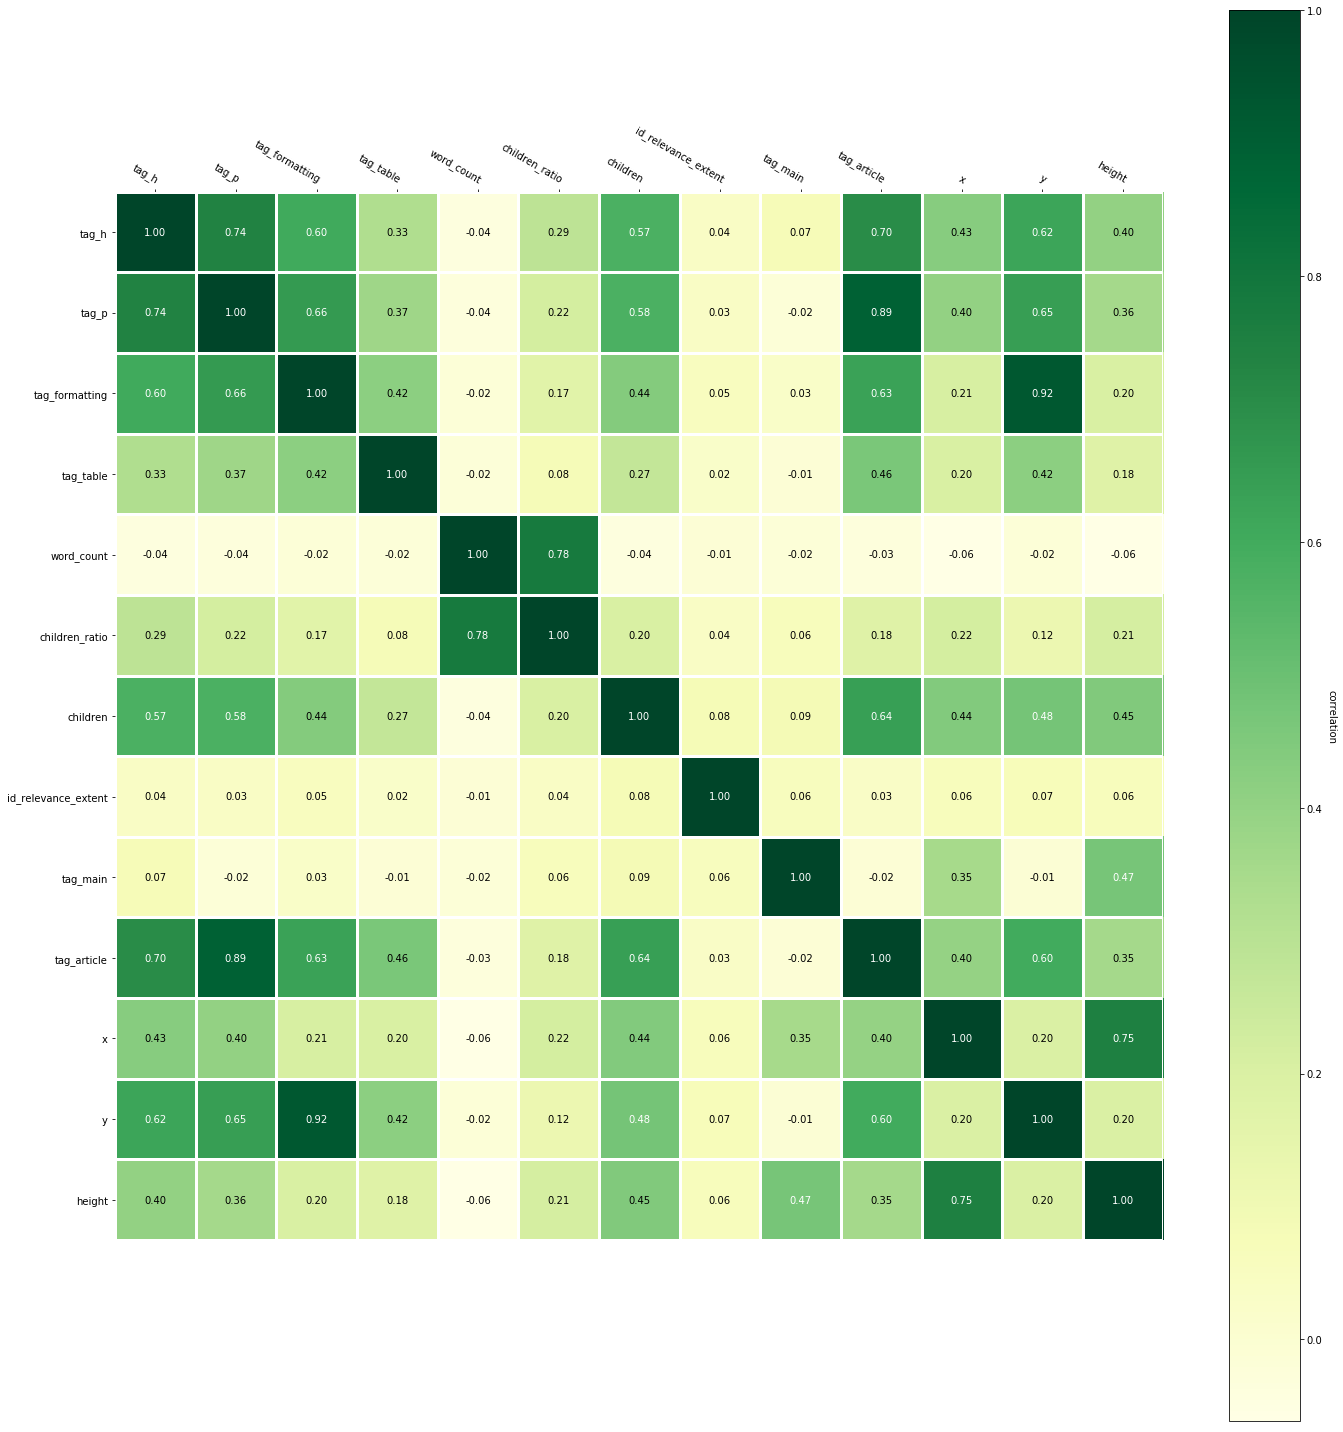

In [60]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (20,20))

im, cbar = heatmap(corr_matrix, list(df.columns), list(df.columns), ax=ax,
                   cmap="YlGn", cbarlabel="correlation")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()